## Complete text preprocessing 

**General Feature Extraction**

*   File loading
*   Word counts
 
*   Character Counts
*   Average Character Count
*   Stopword Count
*   Count #Hashtags and @mentions
*   If numeric digits are present
*   Upper case word counts



**Preprocessing and Cleaning**


*   Lower case
*   Contraction to expansion
*   Emails removals and counts
*   URLs removals and Counts
*   Removal of RT
*   Removal of special characters
*   Removal of multiple characters
*   Removal of HTML tags
*   Removal of accented characters
*   Removal of stopwords
*   Conversion into base form of words
*   Common occuring words removal
*   Word cloud
*   Spelling correction
*   Tokenization
*   Lemmatization
*   Detecting Entities using NER
*   Noun detection
*   Language Detection
*   SEntence detection
*   Using inbuilt sentiment classifier








In [ ]:
import pandas as pd
import numpy as np
import spacy 

In [ ]:
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/laxmimerit/twitter-data/master/twitter4000.csv") 
df

,twitts,sentiment
0,is bored and wants to watch a movie any sugge...,0
1,back in miami. waiting to unboard ship,0
2,"@misskpey awwww dnt dis brng bak memoriessss, ...",0
3,ughhh i am so tired blahhhhhhhhh,0
4,@mandagoforth me bad! It's funny though. Zacha...,0
...,...,...
3995,i just graduated,1
3996,Templating works; it all has to be done,1
3997,mommy just brought me starbucks,1
3998,@omarepps watching you on a House re-run...lov...,1


In [ ]:
df['sentiment'].value_counts()

0    2000
1    2000
Name: sentiment, dtype: int64

##Word Counts

In [ ]:
len('this is text'.split())

3

In [ ]:
df['word_counts'] = df['twitts'].apply(lambda x: len(str(x).split()))

In [ ]:
df.sample(5)

,twitts,sentiment,word_counts
1977,@OfficialMelB i miss your hot butt miss.Mel. ...,0,11
3172,Blue Sky rocked the Longmont Tri. So many awes...,1,17
3699,@AmyyJoanne lol James Morrison all the way x x,1,9
3967,Checking if twitterific wrks on my phone,1,7
1142,@danielsnyder Well that is exciting for you bu...,0,11


In [ ]:
df['word_counts'].max()

32

In [ ]:
df['word_counts'].min()

1

In [ ]:
df[df['word_counts']==1]

,twitts,sentiment,word_counts
385,homework,0,1
691,@ekrelly,0,1
1124,disappointed,0,1
1286,@officialmgnfox,0,1
1325,headache,0,1
1897,@MCRmuffin,0,1
2542,Graduated!,1,1
2947,reading,1,1
3176,@omeirdeleon,1,1
3470,www.myspace.com/myfinalthought,1,1


##Characters Count

In [ ]:
len('this is')

7

In [ ]:
def char_counts(x):
  s = x.split()
  x = ''.join(s)
  return len(x)

In [ ]:
char_counts('this is')

6

In [ ]:
df['char_counts'] = df['twitts'].apply(lambda x: char_counts(str(x)))

In [ ]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts
2836,happy mothers day to all im off to spend the...,1,14,50
3556,@djbriancua yeah thats a good start. back then...,1,28,109
3577,@jaime_fox @jason_mcintyre Sorry abt game 1 S...,1,25,110
2066,@gonetotimbuktu absolutely! love love love tha...,1,14,86
2336,Loves getting off work at 12 noon on Fridays! ...,1,14,63


##Average Word Count

In [ ]:
x = 'this is' #6/2 =3
y = 'thankyou guys' # 12/2 =6

In [ ]:
df['avg_word_len'] = df['char_counts']/df['word_counts']

In [ ]:
df.sample(4)

,twitts,sentiment,word_counts,char_counts,avg_word_len
723,"@sweetkisses277 Out of time, with Denzel Washi...",0,17,86,5.058824
1888,just about to go to work,0,6,19,3.166667
277,@einahpets20 yer I'm good missing Sydney soooo...,0,15,74,4.933333
3494,@jer1990 lol I agree,1,4,17,4.250000


#Stop Words Count

In [ ]:
print(stopwords)

{'any', 'out', 'ours', 'did', 'seem', '‘d', 'whereupon', '’ll', 'everywhere', 'not', 'i', 'or', 'just', 'make', 'sixty', 'rather', '‘ll', 'once', 'still', 'take', '‘re', 'move', 'none', 'serious', 'get', 'around', 'being', 'than', 'somewhere', 'as', 'onto', 'nevertheless', 'beyond', 'whereby', 'moreover', 'together', 'mostly', 'so', 'except', 'either', 'hereupon', 'cannot', 'whoever', 'five', 'many', 'eleven', 'ourselves', 'fifty', 'her', 'in', 'everything', 'my', 'one', 'she', 'may', 'throughout', 'you', 'really', 'same', 'three', 'others', 'across', 'regarding', 'due', 'quite', 'yourselves', 'on', 'often', 'whom', 'for', 'us', 'another', 'down', 'becoming', 'had', 'sometime', 'now', 'during', 'ever', 'within', 'must', 'hereafter', 'anyone', '’m', 'eight', 'himself', 'elsewhere', 'this', 'unless', 'however', 'such', '’re', 'something', 'only', 'when', "'ll", 'an', 'it', 'he', 'be', 'nothing', 'was', 'yours', 'much', 'beside', 'almost', 'via', 'six', 'doing', 'whence', 'per', "'m", 'af

In [ ]:
len(stopwords)

326

In [ ]:
x = 'this is the text data'

In [ ]:
x.split()

['this', 'is', 'the', 'text', 'data']

In [ ]:
[t for t in x.split() if t in stopwords]

['this', 'is', 'the']

In [ ]:
len([t for t in x.split() if t in stopwords])

3

In [ ]:
df['stop_words_len'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t in stopwords]))

In [ ]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len
1364,@MattiaRenee aw poor baby all that 2nd hand sm...,0,9,42,4.666667,2
1206,Gaaaaaaaaaaahhh. Sims 3 fail My laptop doesn'...,0,13,66,5.076923,3
3874,"@heidimontag It was wonderful, just home from ...",1,15,69,4.600000,6
2408,@fddlgrl That hecka sucks. (via @HeckaYeah) ||...,1,13,75,5.769231,1
1956,I'm so happy I didn't expect to have one..let...,0,21,88,4.190476,7


##Count #Hashtag and @Mentions

In [ ]:
x = 'this is #hashtag and this is @mention'

In [ ]:
x.split()

['this', 'is', '#hashtag', 'and', 'this', 'is', '@mention']

In [ ]:
[t for t in x.split() if t.startswith('@')]

['@mention']

In [ ]:
len([t for t in x.split() if t.startswith('@')])

1

In [ ]:
df['hashtag_counts'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.startswith('#')]))

In [ ]:
df['mention_counts'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.startswith('@')]))

In [ ]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtag_counts,mention_counts
1070,@ABBSound ??????? ????? ??? ???? ??? ??? ?? ??...,0,9,46,5.111111,0,0,1
1800,James Broach in the studio for his last EVER s...,0,13,56,4.307692,7,0,0
911,"Family day at church today, and my family will...",0,18,87,4.833333,9,0,0
1880,Airports should be lovely magic places but the...,0,23,109,4.739130,13,0,0
586,"@dawnmay7 Amen, I love house. All of my fav s...",0,15,67,4.466667,3,0,1


##If numeric digits are present in twitts

In [ ]:
x = 'this is 1 and 2'

In [ ]:
x.split()

['this', 'is', '1', 'and', '2']

In [ ]:
x.split()[2].isdigit()

True

In [ ]:
[ t for t in x.split() if t.isdigit()]

['1', '2']

In [ ]:
df['numeric_counts'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.isdigit()]))

In [ ]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtag_counts,mention_counts,numeric_counts
860,yeah. several years ago. miss him every day ...,0,13,59,4.538462,5,0,0,0
2033,@Skeezoyd just kidding! make yourson seeps pl...,1,7,44,6.285714,2,0,1,0
893,Playing pool. Wish i was at gb,0,7,24,3.428571,3,0,0,0
2021,@chriskey They found me - I've no idea where t...,1,17,68,4.000000,6,0,1,0
2776,it's overcast today...storm clouds over the mo...,1,17,93,5.470588,7,0,0,0


##UPPER case words count

In [ ]:
x = 'I AM HAPPY'
Y = 'i am happy'

In [ ]:
[t for t in x.split() if t.isupper()]

['I', 'AM', 'HAPPY']

In [ ]:
df['upper_counts'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.isupper()]))

In [ ]:
df.sample(25)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtag_counts,mention_counts,numeric_counts,upper_counts
2367,"Bonjour!! Soo hot today! 'Ah, summer, what pow...",1,17,75,4.411765,7,0,0,0,0
1939,Did Twitter temporarily disable editing whos t...,0,21,104,4.952381,8,0,0,0,1
1594,@nickeeeh I'm sorry to hear that,0,6,27,4.500000,2,0,1,0,0
1535,anatomy exam in an hour and a half ahhhh,0,9,32,3.555556,4,0,0,0,0
1637,"Just Threw up again,",0,4,17,4.250000,1,0,0,0,0
3594,"@pdurham uh oh, now you have to be nice.",1,9,32,3.555556,5,0,1,0,0
1521,Only 3 hours sleep last night,0,6,24,4.000000,1,0,0,1,0
32,is wishing tomorrow will be easier than today ...,0,13,56,4.307692,6,0,0,0,0
2114,@ShropshirePixie You mind that journey home no...,1,14,73,5.214286,5,0,1,0,0
984,I think people get out of bed in the mornings...,0,17,65,3.823529,9,0,0,0,1


In [ ]:
df.iloc[3962]['twitts']

'@DavidArchie Our local shows love tributes too much. True story! Will be watching SIS videos in Youtube later, haha '

##Preprocessing and Cleaning

##Lower Case Conversion

In [ ]:
x = 'this is Text'

In [ ]:
x.lower()

'this is text'

In [ ]:
x = 45.0
str(x).lower()

'45.0'

In [ ]:
df['twitts']=df['twitts'].apply(lambda x: str(x).lower())

In [ ]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtag_counts,mention_counts,numeric_counts,upper_counts
2767,but would be great bonus if mr commercial sale...,1,23,109,4.739130,7,0,0,0,1
3618,"@tear96 holy fart knockers, its late your on! ...",1,9,46,5.111111,2,0,1,0,0
1719,@thetoughsams we were thinking 2 vs 1 but that...,0,26,112,4.307692,10,0,1,2,1
59,@paulmccourt dunno what sky you're looking at!...,0,15,80,5.333333,3,0,1,0,0
1240,one thing more i think i'm on a wrong place on...,0,16,57,3.562500,5,0,0,0,1


##Contraction to Expansion

In [ ]:
contractions = {
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how does",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
" u ": " you ",
" ur ": " your ",
" n ": " and ",
"won't": "would not",
'dis': 'this',
'bak': 'back',
'brng': 'bring'}



In [ ]:
x = "i m don't he'll" # i am do not he will

In [ ]:
def cont_to_exp(x):
  if type(x) is str:
    for key in contractions:
      value = contractions[key]
      x = x.replace(key, value)
    return x
  else:
    return x

In [ ]:
cont_to_exp(x)

'i m do not he will'

In [ ]:
%%timeit
df['twitts'] = df['twitts'].apply(lambda x: cont_to_exp(x))

10 loops, best of 5: 85.5 ms per loop


In [ ]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtag_counts,mention_counts,numeric_counts,upper_counts
2074,"@renmiu thanks! i love booking stuff online, b...",1,16,73,4.562500,5,0,1,0,2
480,i want my hips done.,0,5,16,3.200000,1,0,0,0,1
2949,perk of working in advancement: fresh ground s...,1,14,72,5.142857,5,0,0,0,0
2237,#followfriday @aileenwilliams thank you,1,4,36,9.000000,1,1,1,0,0
1324,arghhhh...have misplaced my latest draft of th...,0,17,87,5.117647,6,0,0,0,1


##Count and Remove Emails

In [ ]:
import re

In [ ]:
df[df['twitts'].str.contains('hotmail.com')]

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtag_counts,mention_counts,numeric_counts,upper_counts
3713,@securerecs arghh me please markbradbury_16@h...,1,5,51,10.2,0,0,1,0,0


In [ ]:
df.iloc[3713]['twitts']

'@securerecs arghh me please  markbradbury_16@hotmail.com'

In [ ]:
x = '@securerecs arghh me please markbradbury_16@hotmail.com'

In [ ]:
re.findall(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)', x)

['markbradbury_16@hotmail.com']

In [ ]:
df['emails'] = df['twitts'].apply(lambda x: re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)',"", x))


In [ ]:
df['emails_count'] = df['emails'].apply(lambda x: len(x))

In [ ]:
df[df['emails_count']>0]

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtag_counts,mention_counts,numeric_counts,upper_counts,emails,emails_count
0,is bored and wants to watch a movie any sugge...,0,10,43,4.300000,5,0,0,0,0,is bored and wants to watch a movie any sugge...,53
1,back in miami. waiting to unboard ship,0,7,32,4.571429,3,0,0,0,0,back in miami. waiting to unboard ship,40
2,@misskpey awwww dnt this bring back memoriesss...,0,12,54,4.500000,0,0,1,0,1,@misskpey awwww dnt this bring back memoriesss...,70
3,ughhh i am so tired blahhhhhhhhh,0,6,27,4.500000,3,0,0,0,0,ughhh i am so tired blahhhhhhhhh,33
4,@mandagoforth me bad! it is funny though. zach...,0,26,116,4.461538,13,0,2,0,0,@mandagoforth me bad! it is funny though. zach...,143
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,i just graduated,1,3,14,4.666667,2,0,0,0,0,i just graduated,17
3996,templating works; it all has to be done,1,8,32,4.000000,6,0,0,0,0,templating works; it all has to be done,41
3997,mommy just brought me starbucks,1,5,27,5.400000,2,0,0,0,0,mommy just brought me starbucks,32
3998,@omarepps watching you on a house re-run...lov...,1,8,45,5.625000,3,0,1,0,0,@omarepps watching you on a house re-run...lov...,53


In [ ]:
re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)',"", x)

'@securerecs arghh me please '

In [ ]:
df['twitts'] = df['twitts'].apply(lambda x: re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)',"", x))

In [ ]:
df[df['emails_count']>0]

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtag_counts,mention_counts,numeric_counts,upper_counts,emails,emails_count
0,is bored and wants to watch a movie any sugge...,0,10,43,4.300000,5,0,0,0,0,is bored and wants to watch a movie any sugge...,53
1,back in miami. waiting to unboard ship,0,7,32,4.571429,3,0,0,0,0,back in miami. waiting to unboard ship,40
2,@misskpey awwww dnt this bring back memoriesss...,0,12,54,4.500000,0,0,1,0,1,@misskpey awwww dnt this bring back memoriesss...,70
3,ughhh i am so tired blahhhhhhhhh,0,6,27,4.500000,3,0,0,0,0,ughhh i am so tired blahhhhhhhhh,33
4,@mandagoforth me bad! it is funny though. zach...,0,26,116,4.461538,13,0,2,0,0,@mandagoforth me bad! it is funny though. zach...,143
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,i just graduated,1,3,14,4.666667,2,0,0,0,0,i just graduated,17
3996,templating works; it all has to be done,1,8,32,4.000000,6,0,0,0,0,templating works; it all has to be done,41
3997,mommy just brought me starbucks,1,5,27,5.400000,2,0,0,0,0,mommy just brought me starbucks,32
3998,@omarepps watching you on a house re-run...lov...,1,8,45,5.625000,3,0,1,0,0,@omarepps watching you on a house re-run...lov...,53


##Count URLs and Remove it

In [ ]:
x = 'hi, thanks to watching it. for more visit https://www.youtube.com/watch?v=OM4aZJW_Ojs&t=272s'

In [ ]:
re.findall(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', x)


[('https', 'www.youtube.com', '/watch?v=OM4aZJW_Ojs&t=272s')]

In [ ]:
df['url_flags'] = df['twitts'].apply(lambda x: len(re.findall(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/+#-]*[\w@?^=%&/+#-])?', x)))

In [ ]:
x

'hi, thanks to watching it. for more visit https://www.youtube.com/watch?v=OM4aZJW_Ojs&t=272s'

In [ ]:
re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/+#-]*[\w@?^=%&/+#-])?','', x)

'hi, thanks to watching it. for more visit '

In [ ]:
df['twitts'] = df['twitts'].apply(lambda x :re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', "", x))

In [ ]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtag_counts,mention_counts,numeric_counts,upper_counts,emails,emails_count,url_flags
2352,"my brother sleeps long,might go swimming 2day ...",1,16,81,5.062500,4,0,0,1,0,"my brother sleeps long,might go swimming 2day ...",99,0
3404,it is taking great willpower to not eat the ic...,1,21,99,4.714286,8,0,0,0,0,it is taking great willpower to not eat the ic...,121,0
1371,@cinnamoncloud nope! cannot get a signal... m...,0,11,59,5.363636,5,0,1,0,0,@cinnamoncloud nope! cannot get a signal... m...,72,0
3377,i love my mommy!,1,5,40,8.000000,1,0,0,0,1,i love my mommy! http://tumblr.com/xwn1swtpa,45,1
556,but gaddamit! ffxiv is soooo freaking pretty. ...,0,12,80,6.666667,2,0,0,0,2,but gaddamit! ffxiv is soooo freaking pretty. ...,92,1


##Remove RT

In [ ]:
df[df['twitts'].str.contains('rt')]   #rt is read text format here we r trying to read text from tweets

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtag_counts,mention_counts,numeric_counts,upper_counts,emails,emails_count,url_flags
4,@mandagoforth me bad! it is funny though. zach...,0,26,116,4.461538,13,0,2,0,0,@mandagoforth me bad! it is funny though. zach...,143,0
23,"ut oh, i wonder if the ram on the desktop is s...",0,14,46,3.285714,7,0,0,0,2,"ut oh, i wonder if the ram on the desktop is s...",60,0
59,@paulmccourt dunno what sky you're looking at!...,0,15,80,5.333333,3,0,1,0,0,@paulmccourt dunno what sky you're looking at!...,95,0
75,im back home in belfast im realli tired thoug...,0,22,84,3.818182,9,0,0,0,1,im back home in belfast im realli tired thoug...,106,0
81,@lilmonkee987 i know what you mean... i feel s...,0,11,48,4.363636,5,0,1,0,0,@lilmonkee987 i know what you mean... i feel s...,59,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3913,for the press so after she recovered she kille...,1,24,100,4.166667,1,0,0,0,0,for the press so after she recovered she kille...,124,0
3919,earned her cpr &amp; first aid certifications!,1,7,40,5.714286,1,0,0,0,1,earned her cpr &amp; first aid certifications!,47,0
3945,"@teciav &quot;i look high, i look low, i look ...",1,23,106,4.608696,10,0,1,0,0,"@teciav &quot;i look high, i look low, i look ...",129,0
3951,i am soo very parched. and hungry. oh and i am...,1,21,87,4.142857,7,0,0,2,1,i am soo very parched. and hungry. oh and i am...,109,0


In [ ]:
x = 'rt @username: hello hirt'

In [ ]:
re.sub(r'\brt\b', '',x).strip()

'@username: hello hirt'

In [ ]:
df['twitts'] = df['twitts'].apply(lambda x: re.sub(r'\brt\b', '', x).strip())

In [ ]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtag_counts,mention_counts,numeric_counts,upper_counts,emails,emails_count,url_flags
1032,@mohax you did not hear.. i lost 7 regions wor...,0,26,106,4.076923,7,0,1,1,3,@mohax you did not hear.. i lost 7 regions wor...,134,0
1043,oh..wow...!! :o the moon looks sssoooo beautif...,0,25,112,4.480000,9,0,0,0,5,oh..wow...!! :o the moon looks sssoooo beautif...,138,0
2158,@dougiemcfly i loved the show in rio! &quot;th...,1,24,112,4.666667,9,0,1,0,1,@dougiemcfly i loved the show in rio! &quot;th...,136,0
2170,"twittering seems so creepy to me, still",1,7,33,4.714286,4,0,0,0,0,"twittering seems so creepy to me, still",40,0
3352,@swadley okay you caught me! the first time in...,1,21,87,4.142857,8,0,1,0,0,@swadley okay you caught me! the first time in...,108,0


##Special Chars removal or punctuation removals

In [ ]:
x = '@duyku apparrently i was not ready enough.. i...'

In [ ]:
re.sub(r'[^\w ]+','',x)

'duyku apparrently i was not ready enough i'

In [ ]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtag_counts,mention_counts,numeric_counts,upper_counts,emails,emails_count,url_flags
1699,why cannot i watch lost in japan?,0,7,26,3.714286,1,0,0,0,2,why cannot i watch lost in japan?,34,0
3132,@kiwikia yup... at least david-inspired,1,5,35,7.000000,2,0,1,0,0,@kiwikia yup... at least david-inspired,40,0
1857,i broke my iphone it was perfect and i droppe...,0,15,57,3.800000,7,1,0,0,3,i broke my iphone it was perfect and i droppe...,72,0
1705,sad that i am home alone again... without my m...,0,23,93,4.043478,12,0,0,0,0,sad that i am home alone again... without my m...,116,0
2085,"@digooooo yay! i am glad to hear it me too, i...",1,25,113,4.520000,6,0,1,0,2,"@digooooo yay! i am glad to hear it me too, i...",140,0


In [ ]:
df['twitts'] = df['twitts'].apply(lambda x: re.sub(r'[^\w ]+', "", x))

In [ ]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtag_counts,mention_counts,numeric_counts,upper_counts,emails,emails_count,url_flags
2668,chocoboy1der earl i need you 2 vote 4 me wwww...,1,11,51,4.636364,1,0,1,2,1,@chocoboy1der - earl! i need you 2 vote 4 me. ...,62,0
2932,wendywings cute time for a twitpic,1,7,32,4.571429,2,0,1,0,0,@wendywings cute time for a twitpic ;),40,0
198,is sad,0,2,5,2.500000,1,0,0,0,0,is sad,7,0
3128,dpjoyce i am going to be at glastonbury unfort...,1,17,82,4.823529,7,0,1,0,1,@dpjoyce i am going to be at glastonbury unfor...,100,0
1795,with all this shit i have to pay for and get f...,0,22,81,3.681818,15,0,0,0,1,with all this shit i have to pay for and get f...,103,0


##Remove multiple spaces "hi hello"

In [ ]:
x = 'hi   hello     how are you'

In [ ]:
' '.join(x.split())

'hi hello how are you'

In [ ]:
df['twitts'] = df['twitts'].apply(lambda x: ' '.join(x.split()))

In [ ]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtag_counts,mention_counts,numeric_counts,upper_counts,emails,emails_count,url_flags
3523,is updating her blog in livejournal wow,1,8,35,4.375000,3,0,0,0,0,is updating her blog in livejournal wow! ),43,0
2559,_ely_ check your dm,1,4,18,4.500000,1,0,1,0,1,@_ely_ check your dm.,22,0
3188,bigpondteam thaks tez back to speed now all go...,1,20,88,4.400000,7,0,1,0,0,"@bigpondteam thaks tez, back to speed now, all...",108,0
3123,at the castle with jill be back today,1,8,31,3.875000,3,0,0,0,0,at the castle with jill! be back today,39,0
3430,riandawson thx 4 the awesum show you guys neve...,1,27,110,4.074074,6,0,1,1,0,@riandawson thx 4 the awesum show. you guys ne...,149,0


##Remove HTML tags

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
x = '<html><h1> thanks for watching it </h1></html>'

In [ ]:
x.replace('<html><h1>', '').replace('</h1></html>', '') #not rec


' thanks for watching it '

In [ ]:
BeautifulSoup(x, 'lxml').get_text().strip()

'thanks for watching it'

In [ ]:
%%time
df['twitts'] = df['twitts'].apply(lambda x: BeautifulSoup(x, 'lxml').get_text().strip())


CPU times: user 1.21 s, sys: 36.4 ms, total: 1.25 s
Wall time: 1.82 s


##Remove Accented Characters(Chars)

In [ ]:
x = 'Áccěntěd těxt'

In [ ]:
import unicodedata

In [ ]:
def remove_accented_chars(x):
     x = unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8', 'ignore')
     return x

In [ ]:
remove_accented_chars(x)

'Accented text'

In [ ]:
df['twitts']= df['twitts'].apply(lambda x: remove_accented_chars(x))

In [ ]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtag_counts,mention_counts,numeric_counts,upper_counts,emails,emails_count,url_flags
3907,the best part about having alzheimers planning...,1,11,60,5.454545,4,0,0,0,0,the best part about having alzheimers: plannin...,73,0
1852,jamaicanchula i heard that sucks what happened...,0,13,69,5.307692,7,0,1,0,0,@jamaicanchula i heard that sucks what happene...,82,0
2747,thank you hnry342 for giving me a freaking hea...,1,24,109,4.541667,9,0,1,0,0,thank you @hnry342 for giving me a freaking he...,133,0
2731,well nice of you to finally show up sexy mcbadbat,1,10,43,4.300000,4,0,0,0,0,"well, nice of you to finally show up, sexy mcb...",53,0
199,out on money match of wsop 10k hu td9d allin v...,0,27,101,3.740741,8,0,0,0,2,out on money match of wsop $10k hu td9d all-in...,131,0


##Remove Stop Words

In [ ]:
x = 'this is a stop words'

In [ ]:
' '.join([t for t in x.split() if t not in stopwords])

'stop words'

In [ ]:
df['twitts_no_stop'] = df['twitts'].apply(lambda x: ' '.join([t for t in x.split() if t not in stopwords]))

In [ ]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtag_counts,mention_counts,numeric_counts,upper_counts,emails,emails_count,url_flags,twitts_no_stop
3299,goin the shower while the guys go buy somethin...,1,11,44,4.000,6,0,0,0,0,goin the shower while the guys go buy somethin...,55,0,goin shower guys buy eat
2149,i have not smiled this hard in a long time i c...,1,16,58,3.625,7,0,0,0,1,i have not smiled this hard in a long time i ...,75,0,smiled hard long time cant wait happens
1572,made it all the way to vegas with no traffic o...,0,18,72,4.000,10,0,0,1,0,made it all the way to vegas with no traffic o...,90,0,way vegas traffic construction 6 miles hotel
406,had a blood test today,0,5,20,4.000,2,0,0,0,0,had a blood test today!!,25,0,blood test today
2880,touched by the gifts received time will put th...,1,24,102,4.250,15,0,0,0,2,"touched by the gifts received, time will put t...",126,0,touched gifts received time smiles faces heart...


##Convert into Base or Root form of word

In [ ]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
x = 'this is chocolates. what is times? this balls are rolling'

In [ ]:
def make_to_base(x):
  x = str(x)                         
  x_list = []
  doc = nlp(x)
  
  for token in doc: 
    lemma = token.lemma_
    if lemma == '-PRON-' or lemma == 'be':
      lemma =  token.text

    x_list.append(lemma)
  return ' '.join(x_list)    

In [ ]:
make_to_base(x)

'this is chocolate . what is time ? this ball are roll'

In [ ]:
df['twitts'] = df['twitts'].apply(lambda x: make_to_base(x))


In [ ]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtag_counts,mention_counts,numeric_counts,upper_counts,emails,emails_count,url_flags,twitts_no_stop
3095,mrandypuppy enough quothehquot tweet already m...,1,11,69,6.272727,6,0,1,0,0,@mrandypuppy enough of the &quot;heh&quot; twe...,80,0,mrandypuppy quothehquot tweets info required
3053,heh nana cell she so cute when txte,1,11,40,3.636364,4,0,0,0,0,"heh, my nana got a cell. she is so cute when t...",52,0,heh nana got cell cute txting
1600,llauraxxx regret haha can over aaron smash win...,0,21,91,4.333333,8,0,1,0,4,@llauraxxx i regret it haha i cant get over ...,113,0,llauraxxx regret haha cant aaron smashed windo...
391,think emmas goddamn ignore so she avoid say sh...,0,16,71,4.437500,6,0,0,0,1,i think emma's goddamn ignoring me so she avoi...,88,0,think emmas goddamn ignoring avoids saying wan...
168,still wait up guy damn want 360,0,12,40,3.333333,6,0,0,1,1,still waiting for the ups guy damn it i want ...,52,0,waiting ups guy damn want 360


##Common words removal

In [ ]:
x = 'this is this okay bye'


In [ ]:
text = ' '.join(df['twitts'])  

In [ ]:
len(text)

220445

In [ ]:
text = text.split()

In [ ]:
len(text)

54238

In [ ]:
freq_comm = pd.Series(text).value_counts()

In [ ]:
f20 = freq_comm[:20]

In [ ]:
f20

on      427
so      373
at      320
but     302
was     298
just    295
can     293
with    273
day     266
be      264
good    238
this    220
all     218
up      217
will    211
now     207
love    202
work    201
out     201
your    201
dtype: int64

In [ ]:
df['twitts'] = df['twitts'].apply(lambda x:  ' '.join([t for t in x.split() if t not in f20])) 

In [ ]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtag_counts,mention_counts,numeric_counts,upper_counts,emails,emails_count,url_flags,twitts_no_stop
920,even while h8 him he think about x wat wrong w...,0,29,98,3.379310,12,0,0,0,0,even while i h8 him he is all i think about x ...,128,0,h8 think x wats wrong wiv mee x noo im dangero...
1995,find camera,0,4,17,4.250000,1,0,0,0,0,cannot find my camera,22,0,find camera
2303,rainnwilson hahahahahahahah make freak,1,7,49,7.000000,3,0,1,0,1,@rainnwilson hahahahahahahah that made my frea...,56,0,rainnwilson hahahahahahahah freaking day
2641,tyleka omg think only one swoon vincent donofr...,1,17,76,4.470588,9,0,1,0,0,@tyleka omg i thought i was the only one. i sw...,93,0,tyleka omg thought swoon vincent donofrio episode
464,freakingmuse nicht gut arm loulou,0,6,34,5.666667,0,0,1,0,0,@freakingmuse nicht gut armes loulou :*,40,0,freakingmuse nicht gut armes loulou


##Rare word Removals

In [ ]:
rare20 = freq_comm.tail(20)
rare20

loveanalove     1
inform          1
dote            1
possibly        1
dollparts666    1
ichav           1
mp3             1
aubreyoday      1
guide           1
strand          1
ronterrell      1
anatomny        1
eft             1
rudd            1
ato             1
txtz            1
firefoxafter    1
measurement     1
lb              1
rerunlovin      1
dtype: int64

In [ ]:
df['twitts'] = df['twitts'].apply(lambda x: ' '.join([t for t in x.split() if t not in rare20]))

In [ ]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtag_counts,mention_counts,numeric_counts,upper_counts,emails,emails_count,url_flags,twitts_no_stop
3034,pandaran bryanperson yet twitt still bc contro...,1,21,101,4.809524,4,0,2,0,3,"@pandaran @bryanperson and yet, twitter still ...",122,0,pandaran bryanperson twitter works bc control ...
1025,rip grandpa deeply miss by us wealth knowledge...,0,23,104,4.521739,10,0,0,0,1,rip grandpa. you will be deeply missed by all...,127,0,rip grandpa deeply missed wealth knowledge bro...
243,internet damn slow today,0,6,32,5.333333,1,0,0,0,0,internet is getting damn slow today..,38,0,internet getting damn slow today
3487,riskybuinessmb think should reply mmhmm ahaha,1,10,50,5.000000,4,0,1,0,0,@riskybuinessmb i think you should reply to me...,60,0,riskybuinessmb think reply mmhmm ahaha
745,omg omg omg hear cuz his room his girl lol,0,15,49,3.266667,7,0,0,0,0,omg omg omg! i just heard my cuz in his room w...,64,0,omg omg omg heard cuz room girl lol


##Word Cloud Visualization

In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
text = ' '.join(df['twitts'])

In [ ]:
len(text)

199301

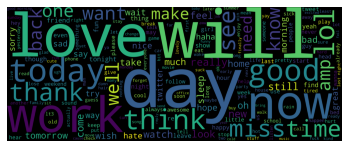

In [ ]:
wc = WordCloud(width=5000, height=2000).generate(text)
plt.imshow(wc)
plt.axis('off')
plt.show()              

##Spelling Correction

In [ ]:
!pip install -U textblob

In [ ]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [ ]:
from textblob import TextBlob

In [ ]:
x = "thainks forr watching it"

In [ ]:
x = TextBlob(x).correct()

In [ ]:
x

TextBlob("thanks for watching it")

##Tokenization Using TextBlob

In [ ]:
x = "thanks#watching this video. please like it"

In [ ]:
TextBlob(x).words

WordList(['thanks', 'watching', 'this', 'video', 'please', 'like', 'it'])

In [ ]:
doc = nlp(x)
for token in doc:
  print(token)

thanks#watching
this
video
.
please
like
it


##Detecting Nouns

In [ ]:
x = 'Breaking News: Donal Trump, the president of th USA is looking to sign a deal to mine the moon'

In [ ]:
doc = nlp(x)

In [ ]:
for noun in doc.noun_chunks:
  print(noun)

Breaking News
Donal Trump
the president
th USA
a deal
the moon


##Language Translation And Detection

In [ ]:
x

'this is this okay bye'

In [ ]:
tb.TextBlob(x)

NameError: ignored

In [ ]:
tb.detect_language()

##Use TextBlob's inbuilt Sentiment Classifier

In [ ]:
from textblob.sentiments import NaiveBayesAnalyzer

In [ ]:
x = 'we all stands together, we are gonna win this fight'

In [ ]:
tb = TextBlob(x, analyzer=NaiveBayesAnalyzer())

In [ ]:
tb.sentiment

Sentiment(classification='pos', p_pos=0.9180581552428241, p_neg=0.0819418447571765)